In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [404]:
train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [405]:
total = pd.concat([train,holdout],ignore_index=True)
total.shape

(2919, 81)

In [406]:
train.shape

(1460, 81)

In [407]:
holdout.shape

(1459, 80)

In [408]:
total_null_cols = train.isnull().sum()==0

In [409]:
total = total.loc[:,total_null_cols]

In [410]:
total.loc[1460:,'SalePrice'] = 0

In [411]:
total.loc[total.loc[:,total.isnull().any()].isnull().any(axis=1),:]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,CentralAir,Condition1,Condition2,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotShape,LowQualFinSF,MSSubClass,MSZoning,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1555,725,499,0,3,1Fam,0.0,0.0,0.0,0.0,689.0,N,Norm,Norm,248,TA,TA,Wd Sdng,Wd Sdng,0,BrkTil,1,Mod,180.0,1.0,1224,1,GasA,Gd,1.5Fin,1556,1,NaN,Lvl,Gtl,10632,Inside,IR1,0,50,RL,0,1,ClearCr,0,3,5,N,0,CompShg,Gable,Normal,0.0,COD,0,Pave,6,689.0,AllPub,0,1917,1950,2010
1915,810,0,0,1,1Fam,0.0,0.0,0.0,0.0,0.0,N,Norm,Norm,0,Fa,Fa,Wd Sdng,Wd Sdng,0,CBlock,1,Min1,280.0,1.0,810,0,GasA,TA,1Story,1916,1,TA,Lvl,Gtl,21780,Inside,Reg,0,30,NaN,0,3,IDOTRR,24,4,2,N,0,CompShg,Gable,Normal,0.0,ConLD,0,Grvl,4,0.0,NaN,119,1910,1950,2009
1945,1474,0,0,3,1Fam,0.0,0.0,0.0,0.0,1632.0,Y,Feedr,Norm,144,TA,TA,BrkFace,BrkFace,2,CBlock,1,Min2,495.0,2.0,1474,0,GasA,TA,1Story,1946,1,TA,Bnk,Gtl,31220,FR2,IR1,0,20,RL,750,5,Gilbert,0,2,6,Y,0,CompShg,Hip,Normal,0.0,WD,0,Pave,7,1632.0,NaN,0,1952,1952,2008
2120,896,0,0,2,1Fam,NaN,NaN,NaN,NaN,NaN,Y,Feedr,Norm,0,TA,TA,MetalSd,CBlock,0,PConc,1,Typ,280.0,1.0,896,0,GasA,TA,1Story,2121,1,TA,Lvl,Gtl,5940,FR3,IR1,0,20,RM,0,4,BrkSide,0,7,4,Y,0,CompShg,Gable,Abnorml,0.0,ConLD,0,Pave,4,NaN,AllPub,0,1946,1950,2008
2151,1518,0,0,2,1Fam,1035.0,0.0,1.0,0.0,545.0,Y,Norm,Norm,0,TA,TA,NaN,NaN,2,PConc,1,Typ,0.0,0.0,1518,0,GasA,Ex,1Story,2152,1,Fa,Lvl,Gtl,19550,Inside,Reg,0,30,RL,0,1,Edwards,39,7,5,Y,0,Tar&Grv,Flat,Normal,0.0,WD,0,Pave,5,1580.0,AllPub,0,1940,2007,2008
2188,3820,0,0,5,1Fam,0.0,0.0,NaN,NaN,0.0,Y,Norm,Norm,0,TA,TA,Plywood,Plywood,2,Slab,3,Typ,624.0,2.0,3820,1,GasA,TA,1Story,2189,1,Ex,Lvl,Gtl,47007,Inside,IR1,0,20,RL,0,7,Edwards,372,7,5,Y,0,CompShg,Gable,Normal,0.0,WD,0,Pave,11,0.0,AllPub,0,1959,1996,2008
2216,733,0,0,2,1Fam,0.0,0.0,0.0,0.0,0.0,N,Norm,Norm,0,Po,Fa,AsbShng,VinylSd,0,Slab,1,NaN,487.0,2.0,733,0,Wall,Po,1Story,2217,1,Fa,Low,Mod,14584,Inside,Reg,0,20,NaN,0,2,IDOTRR,0,5,1,N,0,CompShg,Gable,Abnorml,0.0,WD,0,Pave,4,0.0,AllPub,0,1952,1952,2008
2250,1150,686,0,4,1Fam,0.0,0.0,0.0,0.0,686.0,Y,Norm,Norm,0,TA,TA,Wd Sdng,Wd Sdng,0,BrkTil,2,Maj1,288.0,1.0,1836,0,GasA,Ex,2.5Unf,2251,1,TA,Low,Gtl,56600,Inside,IR1,0,70,NaN,0,1,IDOTRR,0,1,5,N,0,CompShg,Hip,Normal,0.0,WD,0,Pave,7,686.0,AllPub,0,1900,1950,2008
2473,866,504,0,3,1Fam,0.0,0.0,0.0,0.0,771.0,Y,Artery,Norm,0,Fa,Fa,Wd Sdng,Wd Sdng,0,CBlock,2,NaN,264.0,1.0,1484,0,GasA,Fa,1.5Fin,2474,1,TA,Lvl,Gtl,10320,Corner,Reg,114,50,RM,0,9,IDOTRR,211,1,4,N,0,CompShg,Gable,Abnorml,0.0,COD,84,Pave,6,771.0,AllPub,14,1910,1950,2007
2489,1176,0,0,3,1Fam,190.0,873.0,1.0,0.0,95.0,Y,Feedr,Norm,0,TA,TA,Plywood,Plywood,2,CBlock,1,Typ,303.0,1.0,1176,0,GasA,TA,1Story,2490,1,TA,Lvl,Gtl,13770,Corner,Reg,0,20,RL,0,10,Sawyer,0,6,5,Y,0,CompShg,Gable,Normal,0.0,NaN,0,Pave,6,1158.0,AllPub,0,1958,1998,2007


In [412]:
# Replace all remaining null values in holdout with median of column

missing = total.loc[:,total.isnull().any()].columns

for col in missing:
    total.loc[total[col].isnull(),col] = total[col].value_counts().argmax()


In [413]:
total.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BldgType          object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fireplaces         int64
Foundation        object
FullBath           int64
Functional        object
GarageArea       float64
GarageCars       float64
GrLivArea          int64
HalfBath           int64
Heating           object
HeatingQC         object
HouseStyle        object
Id                 int64
KitchenAbvGr       int64
KitchenQual       object
LandContour       object
LandSlope         object
LotArea            int64
LotConfig         object
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object


In [414]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC

From data_descriptions.txt we can tell what type of data each column is:

Id                int64 - Needed for submission file
MSSubClass        int64 - Categorical
MSZoning         object - Categorical
LotArea           int64 - Continuous
Street           object - Categorical
LotShape         object - Categorical
LandContour      object - Categorical
Utilities        object - Categorical
LotConfig        object - Categorical
LandSlope        object - Categorical
Neighborhood     object - Categorical
Condition1       object - Categorical
Condition2       object - Categorical
BldgType         object - Categorical
HouseStyle       object - Categorical
OverallQual       int64 - Categorical
OverallCond       int64 - Categorical
YearBuilt         int64 - Categorical/Continuous
YearRemodAdd      int64 - Categorical/Continuous
RoofStyle        object - Categorical
RoofMatl         object - Categorical
Exterior1st      object - Categorical
Exterior2nd      object - Categorical
ExterQual        object - Categorical
ExterCond        object - Categorical
Foundation       object - Categorical
BsmtFinSF1        int64 - Continuous
BsmtFinSF2        int64 - Continuous
BsmtUnfSF         int64 - Continuous
TotalBsmtSF       int64 - Continuous
Heating          object - Categorical
HeatingQC        object - Categorical
CentralAir       object - Categorical
1stFlrSF          int64 - Continuous
2ndFlrSF          int64 - Continuous
LowQualFinSF      int64 - Continuous
GrLivArea         int64 - Continuous
BsmtFullBath      int64 - Continuous/Categorical
BsmtHalfBath      int64 - Continuous/Categorical
FullBath          int64 - Continuous/Categorical
HalfBath          int64 - Continuous/Categorical
BedroomAbvGr      int64 - Continuous/Categorical
KitchenAbvGr      int64 - Continuous/Categorical
KitchenQual      object - Categorical
TotRmsAbvGrd      int64 - Continuous/Categorical
Functional       object - Categorical
Fireplaces        int64 - Continuous/Categorical
GarageCars        int64 - Continuous/Categorical
GarageArea        int64 - Continuous
PavedDrive       object - Categorical
WoodDeckSF        int64 - Continuous
OpenPorchSF       int64 - Continuous
EnclosedPorch     int64 - Continuous
3SsnPorch         int64 - Continuous
ScreenPorch       int64 - Continuous
PoolArea          int64 - Continuous
MiscVal           int64 - Continuous
MoSold            int64 - Categorical
YrSold            int64 - Categorical
SaleType         object - Categorical
SaleCondition    object - Categorical
SalePrice         int64 - Continuous

In [415]:
# All object columns are categorical and some int64 columns are as well

categorical_cols = list(total.loc[:,total.dtypes=='object'].columns) + ['MSSubClass','OverallQual','OverallCond',
                                                                             'YearBuilt','YearRemodAdd','MoSold',
                                                                             'YrSold','BsmtFullBath','BsmtHalfBath',
                                                                             'FullBath','HalfBath','BedroomAbvGr',
                                                                             'KitchenAbvGr','TotRmsAbvGrd',
                                                                             'Fireplaces','GarageCars']
continuous_cols = [x for x in list(total.columns) if x not in (categorical_cols + ['Id','SalePrice'])]


In [416]:
def normalize_continuous(df):
    for col in continuous_cols:
        df.loc[:,col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return df

In [417]:
total = normalize_continuous(total)

In [418]:
total.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,CentralAir,Condition1,Condition2,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotShape,LowQualFinSF,MSSubClass,MSZoning,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,0.109641,0.413559,0.0,3,1Fam,0.125089,0.0,1.0,0.0,0.064212,Y,Norm,Norm,0.000000,TA,Gd,VinylSd,VinylSd,0,PConc,2,Typ,0.368280,2.0,0.259231,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,0.033420,Inside,Reg,0.0,60,RL,0.0,2,CollgCr,0.082210,5,7,Y,0.0,CompShg,Gable,Normal,208500.0,WD,0.0,Pave,8,0.140098,AllPub,0.000000,2003,2003,2008
1,0.194917,0.000000,0.0,3,1Fam,0.173281,0.0,0.0,1.0,0.121575,Y,Feedr,Norm,0.000000,TA,TA,MetalSd,MetalSd,1,CBlock,2,Typ,0.309140,2.0,0.174830,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,0.038795,FR2,Reg,0.0,20,RL,0.0,5,Veenker,0.000000,8,6,Y,0.0,CompShg,Gable,Normal,181500.0,WD,0.0,Pave,6,0.206547,AllPub,0.209270,1976,1976,2007
2,0.123083,0.419370,0.0,3,1Fam,0.086109,0.0,1.0,0.0,0.185788,Y,Norm,Norm,0.000000,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,0.408602,2.0,0.273549,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,0.046507,Inside,IR1,0.0,60,RL,0.0,9,CollgCr,0.056604,5,7,Y,0.0,CompShg,Gable,Normal,223500.0,WD,0.0,Pave,6,0.150573,AllPub,0.000000,2001,2002,2008
3,0.131695,0.366102,0.0,3,1Fam,0.038271,0.0,1.0,0.0,0.231164,Y,Norm,Norm,0.268775,TA,TA,Wd Sdng,Wd Shng,1,BrkTil,1,Typ,0.431452,3.0,0.260550,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,0.038561,Corner,IR1,0.0,70,RL,0.0,2,Crawfor,0.047170,5,7,Y,0.0,CompShg,Gable,Abnorml,140000.0,WD,0.0,Pave,7,0.123732,AllPub,0.000000,1915,1970,2006
4,0.170342,0.509927,0.0,4,1Fam,0.116052,0.0,1.0,0.0,0.209760,Y,Norm,Norm,0.000000,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,0.561828,3.0,0.351168,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,0.060576,FR2,IR1,0.0,60,RL,0.0,12,NoRidge,0.113208,5,8,Y,0.0,CompShg,Gable,Normal,250000.0,WD,0.0,Pave,9,0.187398,AllPub,0.134831,2000,2000,2008


In [419]:
def dummy_categorical(df):
    dummies = pd.get_dummies(df[categorical_cols],columns=categorical_cols)
    df = pd.concat([df,dummies],axis=1)
    df.drop(categorical_cols,axis=1,inplace=True)
    return(df)

In [420]:
print(total.shape)

total = dummy_categorical(total)

print(total.shape)

(2919, 62)
(2919, 484)


In [421]:
pd.options.display.max_rows = 1000
total.dtypes

1stFlrSF                 float64
2ndFlrSF                 float64
3SsnPorch                float64
BsmtFinSF1               float64
BsmtFinSF2               float64
BsmtUnfSF                float64
EnclosedPorch            float64
GarageArea               float64
GrLivArea                float64
Id                         int64
LotArea                  float64
LowQualFinSF             float64
MiscVal                  float64
OpenPorchSF              float64
PoolArea                 float64
SalePrice                float64
ScreenPorch              float64
TotalBsmtSF              float64
WoodDeckSF               float64
BldgType_1Fam              uint8
BldgType_2fmCon            uint8
BldgType_Duplex            uint8
BldgType_Twnhs             uint8
BldgType_TwnhsE            uint8
CentralAir_N               uint8
CentralAir_Y               uint8
Condition1_Artery          uint8
Condition1_Feedr           uint8
Condition1_Norm            uint8
Condition1_PosA            uint8
Condition1

In [422]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC

In [423]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

def rmsle2(predicted, real):
    sum=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [424]:
total = total.loc[:,total.sum()>10]

In [425]:
'SalePrice' in total[:1460].columns

True

In [426]:


# train = total[:1460].drop('Id',axis=1)

# split = int(train.shape[0]*0.75)

# X_train = train.loc[:split,train.drop('SalePrice',axis=1).columns]
# X_test = train.loc[split:,train.drop('SalePrice',axis=1).columns]
# y_train = train.loc[:split,train.SalePrice]
# y_test = train.loc[:split,train.SalePrice]

# model = LinearSVC()
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)

# error = rmsle2(y_pred,y_test)
# print(error)



In [427]:
# y_test

In [431]:
model = RandomForestRegressor()
features_rmsles = []
for i in range(10,300,10):
    X = total.loc[:1460,:].drop(['Id','SalePrice'],axis=1)
    y = total.loc[:1460,'SalePrice']
    selector = RFE(model,n_features_to_select=i,step=0.1)
#     print('fitting rfe')
    selector.fit(X,y)
#     print('fitted rfe')
    final_features = list(X.columns[selector.support_])
#     print('num features: {}'.format(len(final_features)))

    X = X[final_features]

    kf = KFold(n_splits=5)

    rmsles = []
    for train_indecies, test_indecies in kf.split(X):
#         print("k count: {}".format(len(rmses)+1))
        X_train, X_test = X.loc[train_indecies], X.loc[test_indecies]
        y_train, y_test = y.loc[train_indecies], y.loc[test_indecies]

        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        rmslee = rmsle2(y_test.values,y_pred)
        rmsles.append(rmslee)
    print('num features: {}, rmse: {}'.format(i,np.mean(rmsles)))
    features_rmsles.append(np.mean(rmsles))
#     print(X.shape,'\n\n')

num features: 10, rmse: 0.2914511091675801
num features: 20, rmse: 0.2893252951463624
num features: 30, rmse: 0.2752929936185756
num features: 40, rmse: 0.2799258995720339
num features: 50, rmse: 0.2742177293276188
num features: 60, rmse: 0.27483521069814615
num features: 70, rmse: 0.2758128828725536
num features: 80, rmse: 0.2741164996432531
num features: 90, rmse: 0.2705821107142128
num features: 100, rmse: 0.27342358763951913
num features: 110, rmse: 0.2713960882223376
num features: 120, rmse: 0.27485833936943627
num features: 130, rmse: 0.2725383631358412
num features: 140, rmse: 0.26992416126203167
num features: 150, rmse: 0.2735249495686218
num features: 160, rmse: 0.2735971397837552
num features: 170, rmse: 0.27159179265810485
num features: 180, rmse: 0.2748915821926962
num features: 190, rmse: 0.2771251971559482
num features: 200, rmse: 0.2739979268634367
num features: 210, rmse: 0.27261166997305797
num features: 220, rmse: 0.2719875614775973
num features: 230, rmse: 0.27117303

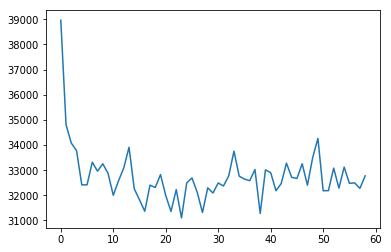

In [432]:
plt.plot(features_rmses)

In [ ]:
np.min(features_rmses)

In [ ]:
X = total.loc[:1460,:].drop(['Id','SalePrice'],axis=1)
y = total.loc[:1460,'SalePrice']

selector = RFE(model,n_features_to_select=120,step=0.1)
selector.fit(X,y)
final_features = list(X.columns[selector.support_])

X = X[final_features]

model.fit(X,y)

holdout_pred = model.predict(total.loc[1460:,final_features])
submission = pd.DataFrame({'Id':holdout.Id,'SalePrice':holdout_pred})
submission.to_csv('submission.csv',index=False)